## Analysis of a Car Sell Dataset Part 2

There are two goals in the second analysis task: (1), train linear regression models to predict the selling prices of cars; (2) assess the data ethics issues. There are *7* questions in this portfolio. 

The first goal involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset that **is different from** the one in “Analysis of a Car Sell Dataset” task 1. This goal covers Questions *1-6*. 

Question *7* is about data ethics issue.

In [3]:
your_name = "Sulaiman Yusuf Zakaria"
your_student_id = "47895810"

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Q1: Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [6]:
cs = pd.read_csv('dataporto2/car_sells_clean_data.csv')
print(len(cs))

3657


### Q2: Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict cars' selling prices given other columns, please get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., seller_type and owner) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding selling_price. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for selling_price prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [8]:
cs.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [9]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year           3657 non-null   float64
 2   selling_price  3657 non-null   int64  
 3   km_driven      3657 non-null   int64  
 4   fuel           3657 non-null   object 
 5   seller_type    3657 non-null   object 
 6   transmission   3657 non-null   object 
 7   owner          3657 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 228.7+ KB


### Data type
* year - float64
* km_driven - int64
* seller_type - object
* fuel - object
* owner - object
* selling_price - int64

You need to convert the categorical data into numerical.
You need to import `OrdinalEncoder` from `sklearn.preprocessing`, In this step you need to change seller_type, fuel, and owner from object to numerical

In [11]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc=OrdinalEncoder(dtype=int)

# Convert categorical columns to numerical
cs["seller_type_code"] = ord_enc.fit_transform(cs[["seller_type"]])
cs["fuel_code"] = ord_enc.fit_transform(cs[["fuel"]])
cs["owner_code"] = ord_enc.fit_transform(cs[["owner"]])

cs[["seller_type_code", "seller_type", "fuel", "fuel_code", "owner", "owner_code"]].head()


,seller_type_code,seller_type,fuel,fuel_code,owner,owner_code
0,1,Individual,Petrol,1,First Owner,0
1,1,Individual,Petrol,1,First Owner,0
2,1,Individual,Diesel,0,First Owner,0
3,1,Individual,Petrol,1,First Owner,0
4,1,Individual,Diesel,0,Second Owner,1


In [12]:
cs.fuel.unique()

array(['Petrol', 'Diesel'], dtype=object)

In [13]:
cs.seller_type.unique()

array(['Individual', 'Dealer'], dtype=object)

In [14]:
cs.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner'], dtype=object)

In [15]:
# Make sure the data type is already changing 
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3657 non-null   object 
 1   year              3657 non-null   float64
 2   selling_price     3657 non-null   int64  
 3   km_driven         3657 non-null   int64  
 4   fuel              3657 non-null   object 
 5   seller_type       3657 non-null   object 
 6   transmission      3657 non-null   object 
 7   owner             3657 non-null   object 
 8   seller_type_code  3657 non-null   int32  
 9   fuel_code         3657 non-null   int32  
 10  owner_code        3657 non-null   int32  
dtypes: float64(1), int32(3), int64(2), object(5)
memory usage: 271.5+ KB


In [16]:
cs.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seller_type_code,fuel_code,owner_code
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner,1,1,0
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner,1,1,0
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner,1,0,0
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner,1,1,0
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner,1,0,1


In [17]:
# Find correlation
corr_year = cs['year'].corr(cs['selling_price']) 
corr_km_driven = cs['km_driven'].corr(cs['selling_price'])
corr_seller_type_code = cs['seller_type_code'].corr(cs['selling_price'])
corr_fuel_code = cs['fuel_code'].corr(cs['selling_price'])
corr_owner_code = cs['owner_code'].corr(cs['selling_price'])

print('corr_year: ', corr_year)
print('corr_km_driven: ', corr_km_driven)
print('corr_seller_type_code: ', corr_seller_type_code)
print('corr_fuel_code: ', corr_fuel_code)
print('corr_owner_code: ', corr_owner_code)

corr_year:  0.41110276220633124
corr_km_driven:  -0.17720277985723884
corr_seller_type_code:  -0.20863704840276948
corr_fuel_code:  -0.2776270434173492
corr_owner_code:  -0.2055235873112245


Most to least
1. corr_year:  0.41110276220633124
2. corr_fuel_code:  -0.2776270434173492
3. corr_seller_type_code:  -0.20863704840276948
4. corr_owner_code:  -0.2055235873112245
5. corr_km_driven:  -0.17720277985723884

* most correlated depends on the score, not on the negative or positive values

### Short Analysis
The year of the car has the most significant positive impact on the selling price, while other factors like mileage, seller type, fuel type, and the number of previous owners have weaker negative impacts. This suggests that newer cars generally sell for more, and other factors have a negative correlation score on selling price. In conclusion, a negative correlation can be interpreted as a decrease in selling price.

### Most and Least Correlation om Selling Price:

#### Most Correlated: 
The feature year is the most correlated with the selling price, having the highest positive correlation (0.41). This suggests that it will be the most influential feature in predicting the selling price, as newer cars tend to have higher prices.

#### Least Correlated: 
The feature km_driven has the least correlation with the selling price, with a weak negative correlation (-0.18). This indicates that while mileage may have some impact, it will likely be a less significant predictor compared to other features.

### Hypothesis:

    - Car year will be the strongest predictor, leading to more accurate predictions when this feature is used in the model

    - Features such as km_driven may contribute less to the final prediction due to their weak correlation, but should still be included to capture residual variations
    
    - Categorical variables will provide additional context, but their influence will be secondary compared to numeric features such as year.

### Q3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [21]:
# 0.9 show percentage of data test
train_case1, test_case1 = train_test_split(cs, test_size=0.9, random_state=142)
print('Case 1 train shape:', train_case1.shape)
print('Case 1 test shape:', test_case1.shape)

Case 1 train shape: (365, 11)
Case 1 test shape: (3292, 11)


In [22]:
# 0.1 show percentage of data test
train_case2, test_case2 = train_test_split(cs, test_size=0.1, random_state=142)
print('Case 2 train shape:', train_case2.shape)
print('Case 2 test shape:', test_case2.shape)

Case 2 train shape: (3291, 11)
Case 2 test shape: (366, 11)


### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding selling_price, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

Most to least:
corr_year -> corr fuel code -> corr_seller type code -> corr owner code -> corr km driven

I chose to use training data for my model

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features all model
features_most_corr = ['year', 'fuel_code']
features_least_corr = ['owner_code','km_driven']

In [26]:
# Train the linear regression model
model_a = LinearRegression()

# Prepare the testing and training data model a
X_test_a = test_case1[features_most_corr]
y_test_a = test_case1['selling_price']

X_train_a = train_case1[features_least_corr]
y_train_a = train_case1['selling_price']

model_a.fit(X_test_a, y_test_a)

LinearRegression()

In [27]:
# Train the linear regression model
model_b = LinearRegression()

# Prepare the testing and training data model b
X_test_b = test_case1[features_least_corr]
y_test_b = test_case1['selling_price']

X_train_b = train_case1[features_least_corr]
y_train_b = train_case1['selling_price']

model_b.fit(X_test_b, y_test_b)

LinearRegression()

In [28]:
# Train the linear regression model
model_c = LinearRegression()

# Prepare the testing and training data model c
X_test_c = test_case2[features_most_corr]
y_test_c = test_case2['selling_price']

X_train_c = train_case2[features_least_corr]
y_train_c = train_case2['selling_price']

model_c.fit(X_test_c, y_test_c)

LinearRegression()

In [29]:
# Train the linear regression model
model_d = LinearRegression()

# Prepare the testing and training data model d
X_test_d = test_case2[features_least_corr]
y_test_d = test_case2['selling_price']

X_train_d = train_case2[features_least_corr]
y_train_d = train_case2['selling_price']

model_d.fit(X_test_d, y_test_d)

LinearRegression()

### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [31]:
# Case 1
predicted_a1 = model_a.predict(X_test_a)
mse_a1 = ((np.array(y_test_a)-predicted_a1)**2).sum()/len(y_test_a)
rmse_a1 = np.sqrt(mse_a1)

print("Case A MSE:", mse_a1)
print("Root MSE:", rmse_a1)

Case A MSE: 228156200483.57187
Root MSE: 477656.9904058475


In [32]:
# Case 2
predicted_b = model_b.predict(X_test_b)
mse_b = ((np.array(y_test_b)-predicted_b)**2).sum()/len(y_test_b)
rmse_b = np.sqrt(mse_b)

print("Case B MSE:", mse_b)
print("Root MSE:", rmse_b)

Case B MSE: 276556294365.2751
Root MSE: 525886.1990633288


In [33]:
# Case 3
predicted_c = model_c.predict(X_test_c)
mse_c = ((np.array(y_test_c)-predicted_c)**2).sum()/len(y_test_c)
rmse_c = np.sqrt(mse_c)

print("Case C MSE:", mse_c)
print("Root MSE:", rmse_c)

Case C MSE: 180128990705.57043
Root MSE: 424416.05849162966


In [34]:
# Case d
predicted_d = model_d.predict(X_test_d)
mse_d = ((np.array(y_test_d)-predicted_d)**2).sum()/len(y_test_d)
rmse_d = np.sqrt(mse_d)

print("Case D MSE:", mse_d)
print("Root MSE:", rmse_d)

Case D MSE: 237426977271.10852
Root MSE: 487264.7917417269


## Result 
1. Case A MSE: 228156200483.57187    
Root MSE: 477656.990405847

2. Case B MSE: 276556294365.2751    
Root MSE: 525886.199063328

3. Case C MSE: 180128990705.57043    
Root MSE: 424416.0584916296

4. Case D MSE: 237426977271.10852    
Root MSE: 487264.791741726
968885

### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

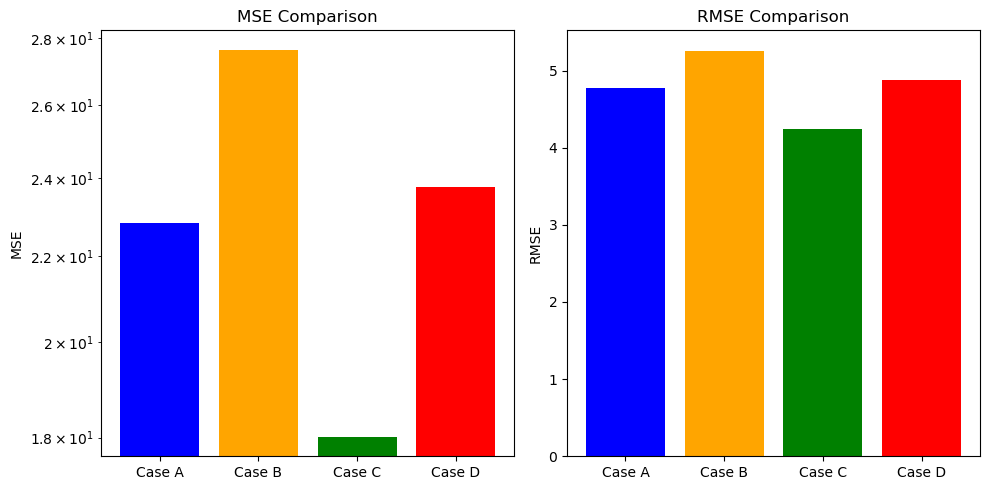

In [37]:
# MSE and RMSE values for each case
# Divided the value just for visualization 
mse_values = [22.815, 27.655, 18.012, 23.742]
rmse_values = [4.776, 5.258, 4.244, 4.872]
case_labels = ['Case A', 'Case B', 'Case C', 'Case D']

# Plotting MSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(case_labels, mse_values, color=['blue', 'orange', 'green', 'red'])
plt.yscale('log')  # Use a log scale if the values differ significantly
plt.title('MSE Comparison')
plt.ylabel('MSE')

# Plotting RMSE
plt.subplot(1, 2, 2)
plt.bar(case_labels, rmse_values, color=['blue', 'orange', 'green', 'red'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

Higher to lower MSE and R-MSE (MSE, R-MSE)

Case B (27.655, 52.588)  -> Case D (23.742, 48.726) -> Case A (22.815, 47.765) -> Case C (18.012, 42.441)

A large MSE indicates a significant prediction error. RMSE measures the average prediction error in the same units as the original data. A high RMSE value indicates the model often makes quite large errors in predictions.

Case C: Achieved the lowest MSE and RMSE, confirming that more data and better feature selection improve model performance.

Case A: Slightly higher MSE and RMSE than Case C, showing a smaller dataset reduces accuracy.

Case B: Highest MSE and RMSE, indicating that poor feature selection combined with less data leads to the worst model performance

.
Case D: Better than Case B but worse than Case C, suggesting that more data helps, but poor feature selection still limits accuracy.

### Q7: Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


Table 1 sorts the countries by total medals, placing the United States at the top.
Table 2 sorts by gold medals, positioning China first. 
This sorting can lead to biased interpretations depending on which aspects to prioritize.

Potential Bias and Misleading Presentation: 
Sorting criteria can manipulate the viewer's perception, making one country seem more successful depending on which object is prioritized. Viewers can conclude that a country is superior to others if they only look at this data carelessly. some people will say China is a winner and some of them will say the US is the winner

Lack of Context: The table does not explain the sequencing options, so it may mislead viewers into believing that one approach is the definitive measure of Olympic success. This lack of transparency is problematic from an ethical perspective, as it clouds the overall picture and can lead to certain conflicts.

Overall, the ethical concern lies in the potential manipulation of data presentation to influence audience interpretation. this table can not be trusted because viewers do not know how Olympic need to be won based on the table